<a href="https://colab.research.google.com/github/SharonEstivalez/FisicaComputacional1/blob/master/Actividad%205/Actividad5_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***$$ACTIVIDAD  \space 5$$***



Pacheco Rodriguez Sharon Estivalez

 12/ 02/ 21
 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Estacionalidad, tendencia y residuo 
import statsmodels.api as sm

%matplotlib inline

In [60]:
#Tomar url en raw
url = 'https://raw.githubusercontent.com/SharonEstivalez/FisicaComputacional1/master/Actividad%203/10090.txt'

#Nombres para las columnas
col =  ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] 

# encoding='cp1251' Windows (Europa Occidental)
# sep='\s+' el separador de datos es de uno o más espacios
#header=None no hay encabezado
#skiprows=19 Se brincará los primeros 19 renglones 
#skipfooter=1 Se brincará el último renglón
#engine='python' Se procesan los datos utilizando Python 
df_act = pd.read_csv(url, names=col, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacer una copia del DataFrame
df_sp0 = df_act.copy()

#Reemplazar "Nulo" por espacio en blanco
str_Nulo = 'Nulo'
df_sp1 = df_sp0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertir las valores de Precip, Evap, Tmax y Tmin en flotantes
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_sp1[cols] = pd.to_numeric(df_sp1[cols], errors='coerce')

#Hacer copia del DataFrame anterior para trabajar con ella

df_sp2 = df_sp1.copy()

#Tomar "Fecha" y convertirlo al formato fecha que entiende python
df_sp2['Fecha'] = pd.to_datetime(df_sp2['Fecha'], dayfirst=True).copy()


#Añadir dos columnas, año y fecha

df_sp2['Año'] = df_sp2['Fecha'].dt.year
df_sp2['Mes'] = df_sp2['Fecha'].dt.strftime('%b')


#Nueva copia para este trabajo
df_dm = df_sp2.copy()
df_dm.info()
print(df_dm.head())
print(df_dm.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19592 entries, 0 to 19591
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19592 non-null  datetime64[ns]
 1   Precip  19558 non-null  float64       
 2   Evap    17688 non-null  float64       
 3   Tmax    19484 non-null  float64       
 4   Tmin    19487 non-null  float64       
 5   Año     19592 non-null  int64         
 6   Mes     19592 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1963-08-01     0.0   3.6  28.0  10.0  1963  Aug
1 1963-08-02     0.0   4.8  21.0  11.0  1963  Aug
2 1963-08-03     0.0   4.5  25.0  10.0  1963  Aug
3 1963-08-04     0.0   4.0  18.0  11.0  1963  Aug
4 1963-08-05     9.0   2.5  24.5  12.0  1963  Aug
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
19587 2018-12-27     0.0   NaN  22.0   2.0  2018  Dec
19588 2

# **Series de tiempo**
Reemplazar índice por fecha


In [61]:
#Copia del DataFrame 
df_dm_ts = df_dm.copy()

#El índice será la variable 'Fecha'
df_dm_ts = df_dm_ts.set_index('Fecha')

df_dm_ts.info()
print(df_dm_ts.head())
print(df_dm_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19592 entries, 1963-08-01 to 2018-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  19558 non-null  float64
 1   Evap    17688 non-null  float64
 2   Tmax    19484 non-null  float64
 3   Tmin    19487 non-null  float64
 4   Año     19592 non-null  int64  
 5   Mes     19592 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1963-08-01     0.0   3.6  28.0  10.0  1963  Aug
1963-08-02     0.0   4.8  21.0  11.0  1963  Aug
1963-08-03     0.0   4.5  25.0  10.0  1963  Aug
1963-08-04     0.0   4.0  18.0  11.0  1963  Aug
1963-08-05     9.0   2.5  24.5  12.0  1963  Aug
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2018-12-27     0.0   NaN  22.0   2.0  2018  Dec
2018-12-28     0.0   NaN  22.0  -3.0 

In [62]:
#Hacer períodos de 30 años aprox
#1963-2018
df_63 = df_dm_ts[(df_dm_ts['Año'] >= 1963) & (df_dm_ts['Año'] < 1990)]
df_90 = df_dm_ts[(df_dm_ts['Año'] >= 1990) & (df_dm_ts['Año'] < 2018)]

df_90.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1990-01-01,0.0,4.0,19.0,0.0,1990,Jan
1990-01-02,0.0,4.3,20.0,1.0,1990,Jan
1990-01-03,0.0,4.0,16.0,3.0,1990,Jan
1990-01-04,0.0,3.7,17.0,-1.0,1990,Jan
1990-01-05,13.0,4.0,15.0,2.0,1990,Jan


# ***Actividad 1***

Text(0.5, 1.0, 'Precipitación de los últimos 30 años en Canatlán, Durango)')

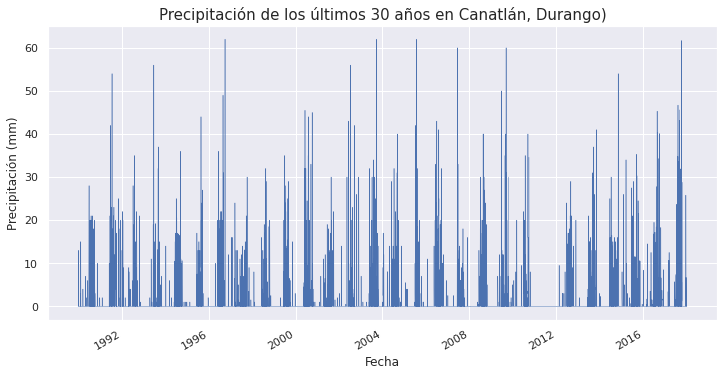

In [63]:
#Gráfica de precipitación de los últimos 30 años (1990-hasta 2018)

sns.set(rc={'figure.figsize':(12, 6)})

df_90['Precip'].plot(linewidth=0.5);

plt.ylabel('Precipitación (mm)');
plt.title('Precipitación de los últimos 30 años en Canatlán, Durango)', fontsize=15)

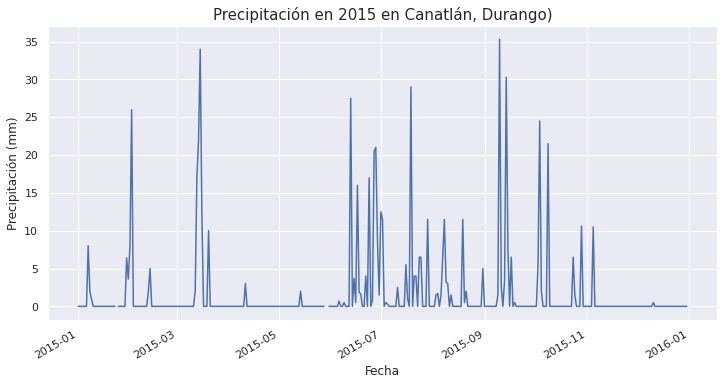

In [64]:
#Para el año de 2015

ax = df_90.loc['2015', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');
plt.title('Precipitación en 2015 en Canatlán, Durango)', fontsize=15) 
plt.show()

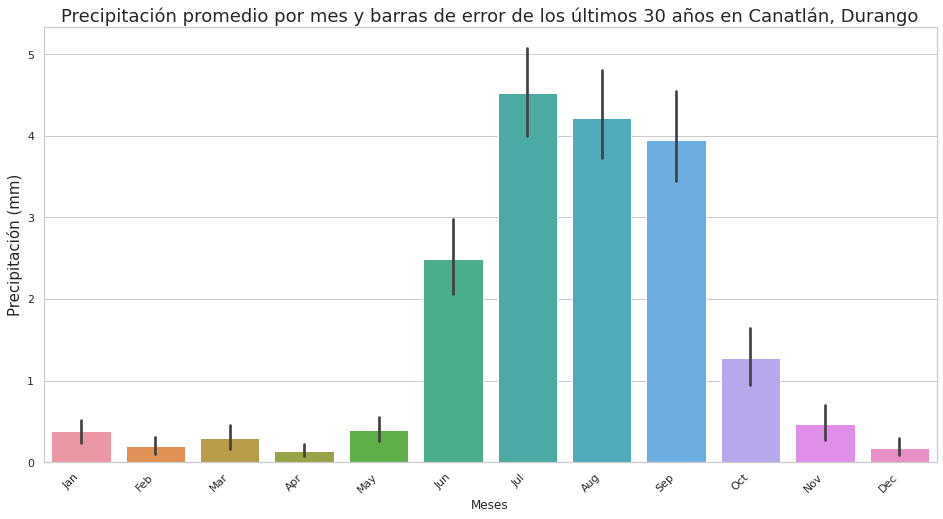

In [65]:
#Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

graf = sns.barplot(x = 'Mes', y = 'Precip', data= df_90);

#Rotar 45° los años en el eje horizontal 
graf.set_xticklabels(graf.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)', fontsize= 15)
plt.title('Precipitación promedio por mes y barras de error de los últimos 30 años en Canatlán, Durango', fontsize=18)

plt.show()

# ***Actividad 2***

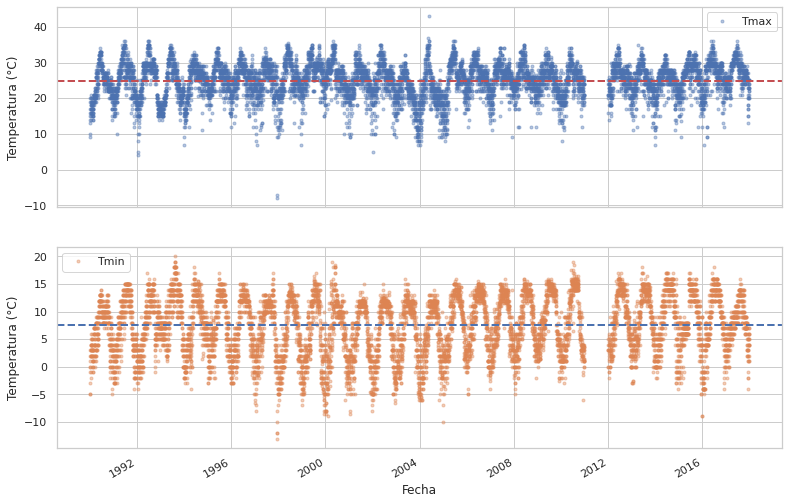

In [66]:
#Explora tus datos de temperaturas máxima y mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

cols2 = ['Tmax','Tmin']
ej_ylabels = ['Temperatura máxima (°C)','Temperatura mínima (°C)']

Tmax90 = df_90['Tmax'].mean()
Tmin90 = df_90['Tmin'].mean()

ejes = df_90[cols2].plot(marker = '.', alpha=0.4, linestyle= 'None', figsize=(13,9), subplots = True)

for i, ej in zip(cols2, ejes):
  if i== 'Tmax':
    ej.axhline(Tmax90, color = 'r', linestyle = '--', linewidth = 2)
    ej.set_ylabel('Temperatura (°C)')

  elif i== 'Tmin':
    ej.axhline(Tmin90, color = 'b', linestyle = '--', linewidth = 2)
    ej.set_ylabel('Temperatura (°C)')



Text(0.5, 0, 'Fecha')

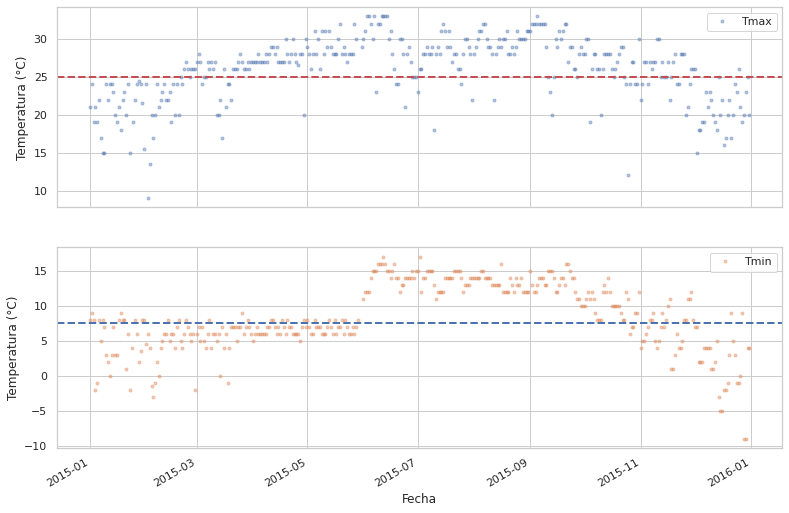

In [67]:
#Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 

ejes = df_90[cols2].loc["2015"].plot(marker = '.', alpha=0.4, linestyle = 'None', figsize=(13,9), subplots = True)

for i, ej in zip(['Tmax', 'Tmin'],ejes):
  if i == 'Tmax':
    ej.axhline(Tmax90, color = 'r', linestyle = '--', linewidth = 2)
    ej.set_ylabel('Temperatura (°C)')

  elif i == 'Tmin':
    ej.axhline(Tmin90, color = 'b', linestyle = '--', linewidth =2)
    ej.set_ylabel('Temperatura (°C)')
plt.xlabel('Fecha')

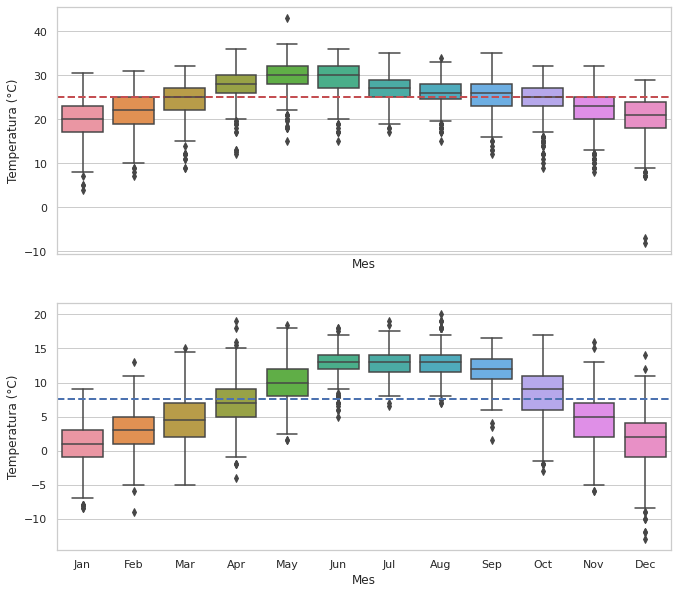

In [80]:
#Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

fig, ejes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for i, e in zip(['Tmax', 'Tmin'], ejes):
  sns.boxplot(data=df_90, x='Mes', y=i, ax=e)

  if i == 'Tmax':
    e.axhline(Tmax90, color = 'r', linestyle = '--', linewidth = 2)
    e.set_ylabel('Temperatura (°C)')

  elif i == 'Tmin':
    e.axhline(Tmin90, color = 'b', linestyle = '--', linewidth = 2)
    e.set_ylabel('Temperatura (°C)')

  ax.set_title(i)

  #Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != ejes[-1]:
    ax.set_xlabel('')

# ***Actividad 3***

Text(0, 0.5, 'Evaporación (mm)')

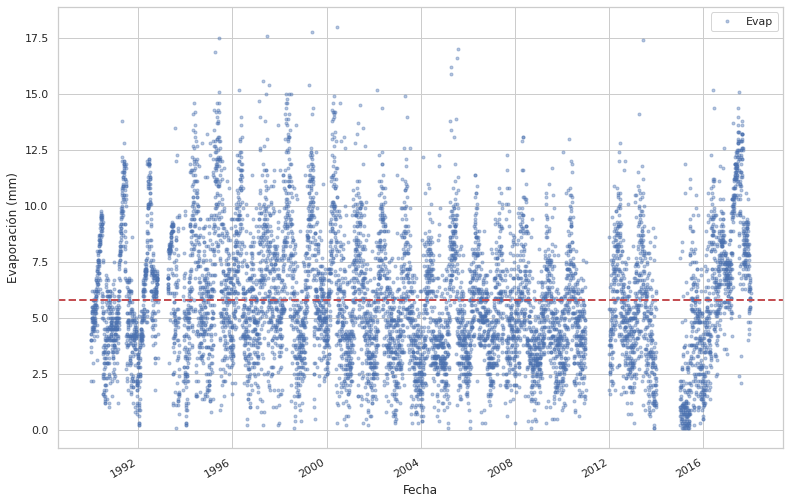

In [87]:
#Datos de los últimos 30 años

cols3 = ['Evap']
Evap90 =df_90['Evap'].mean()

ejes=df_90[cols3].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9))

plt.axhline(Evap90, color='r', linestyle='--', linewidth=2)
plt.ylabel('Evaporación (mm)') 


Text(0, 0.5, 'Evaporación (mm)')

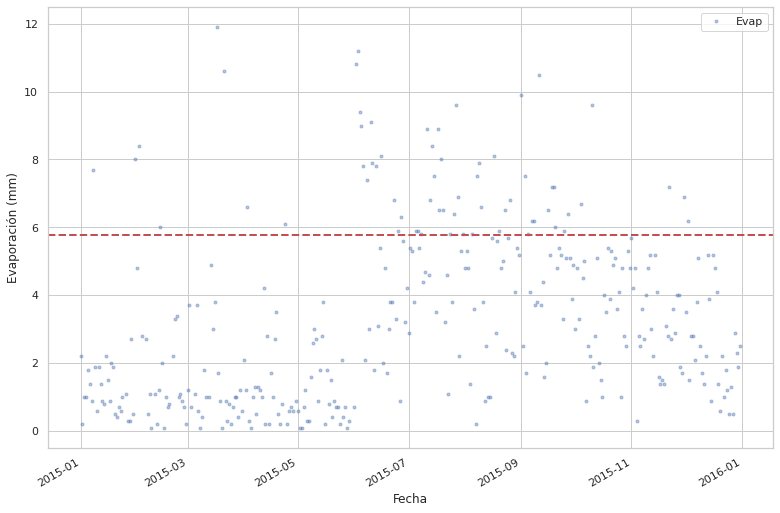

In [88]:
#Para un año en específico (2015)

ejes=df_90[cols3].loc["2015"].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9))
plt.axhline(Evap90, color='r', linestyle='--', linewidth=2)
plt.ylabel('Evaporación (mm)')

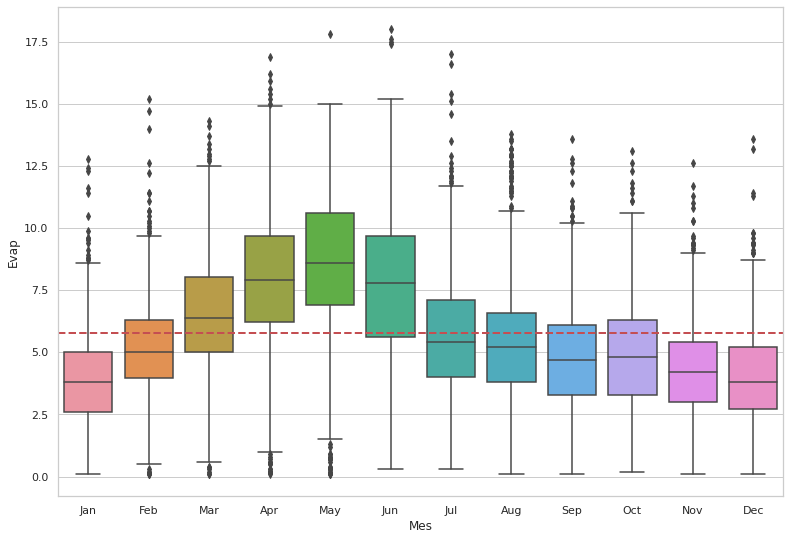

In [90]:
#Estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

fig, ejes = plt.subplots(1, 1, figsize=(13, 9), sharex=True)
sns.boxplot(data=df_90, x='Mes', y='Evap')
plt.axhline(Evap90, color='r', linestyle='--', linewidth=2)
plt.ylabels=('Evaporación (mm)')

# ***Actividad 4***

In [109]:
# Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días,
# utilizando la función df.rolling(). Explora tus datos:

NDF = ['Evap', 'Tmax', 'Tmin']

df_90_7 = df_90[NDF].rolling(7, center = True, min_periods = 1).mean()
df_90_30 = df_90[NDF].rolling(30, center = True, min_periods = 1).mean()
df_90_365 = df_90[NDF].rolling(365, center = True, min_periods = 1).mean()

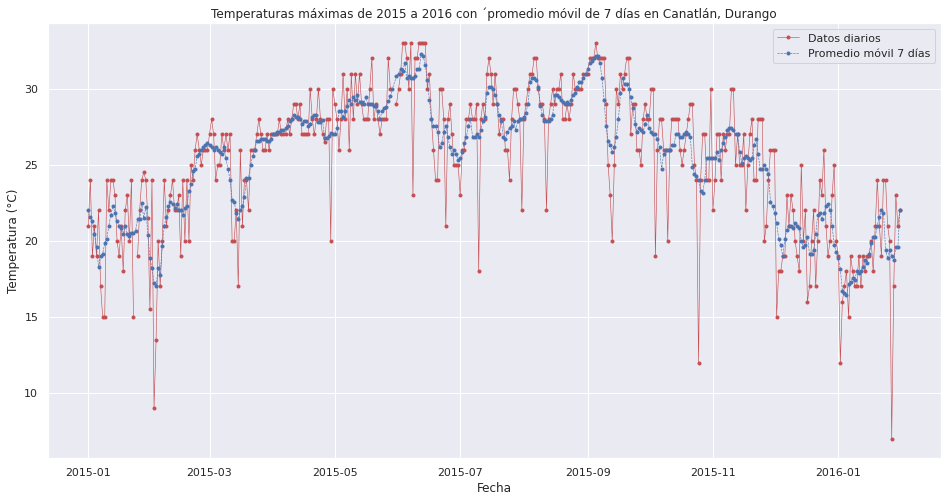

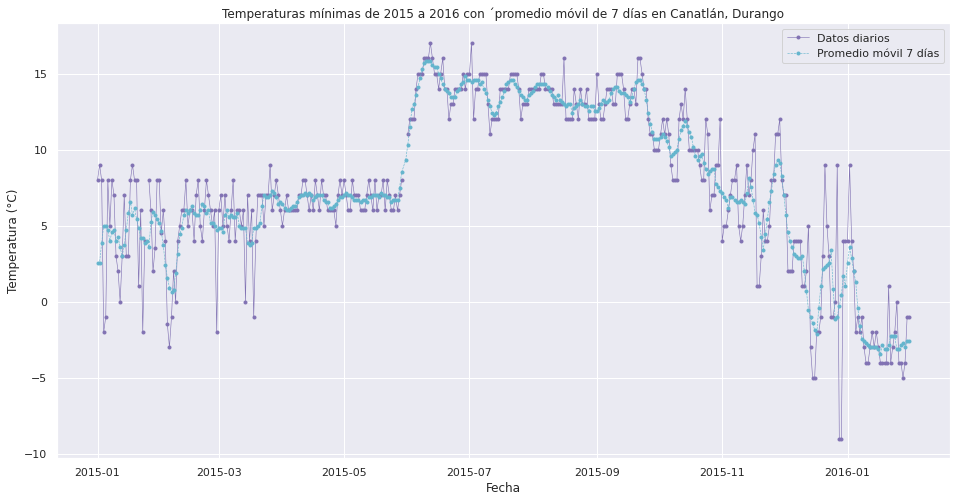

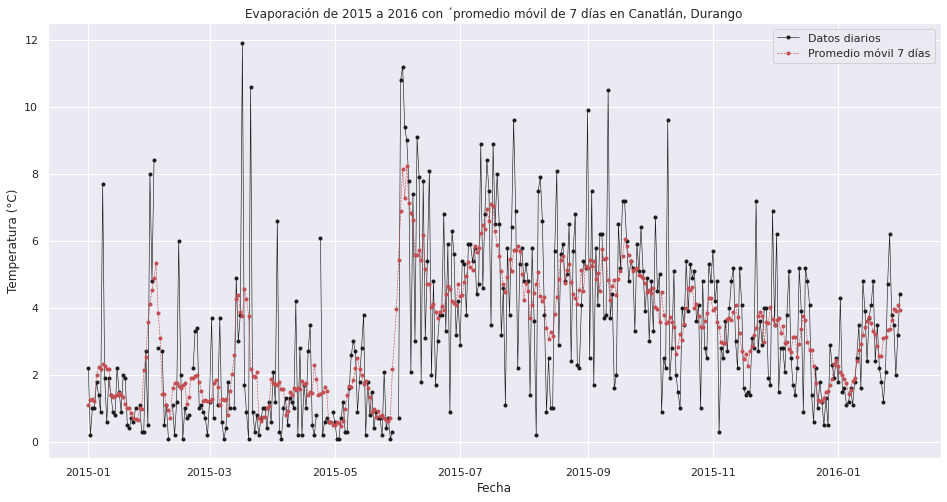

In [110]:
#Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 días

start, end = '2015-01', '2016-01'

sns.set(rc={'figure.figsize':(16, 8)})


#Para temperatura máxima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'], marker='.', linestyle = '-', color = 'r', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_7.loc[start:end, 'Tmax'], marker='.', linestyle = '--', color = 'b', linewidth = 0.6, label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas de 2015 a 2016 con ´promedio móvil de 7 días en Canatlán, Durango')
ax.legend();


#Para temperatura mínima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'], marker='.', linestyle = '-', color = 'm', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_7.loc[start:end, 'Tmin'], marker='.', linestyle = '--', color = 'c', linewidth = 0.6, label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas de 2015 a 2016 con ´promedio móvil de 7 días en Canatlán, Durango')
ax.legend();


#Para Evaporación

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'], marker='.', linestyle = '-', color = 'k', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_7.loc[start:end, 'Evap'], marker='.', linestyle = '--', color = 'r', linewidth = 0.6, label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Evaporación de 2015 a 2016 con ´promedio móvil de 7 días en Canatlán, Durango')
ax.legend();


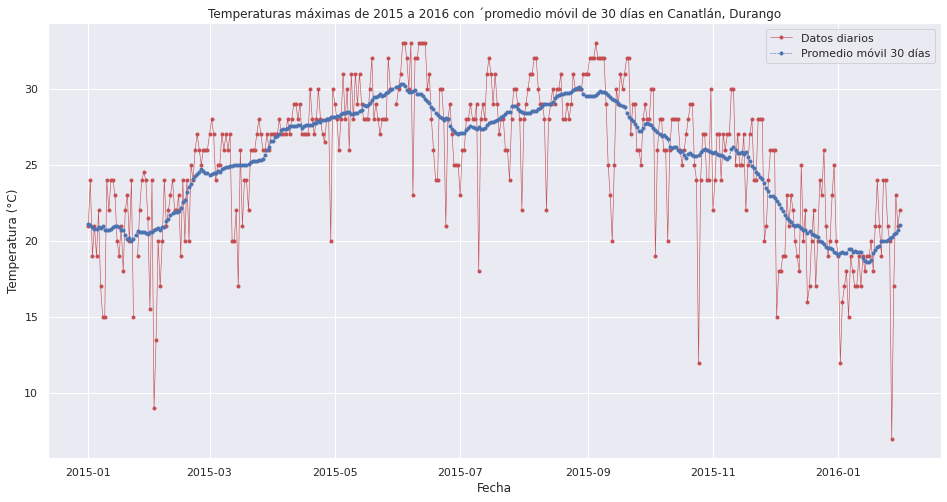

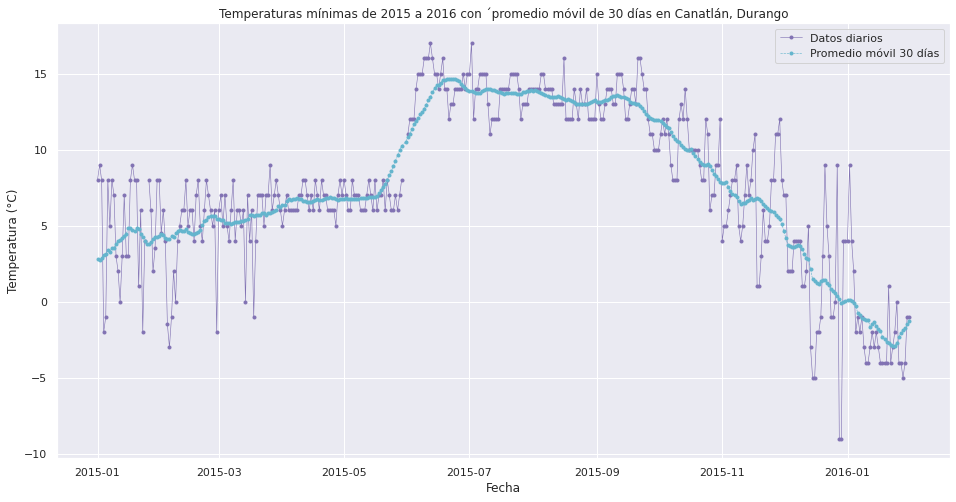

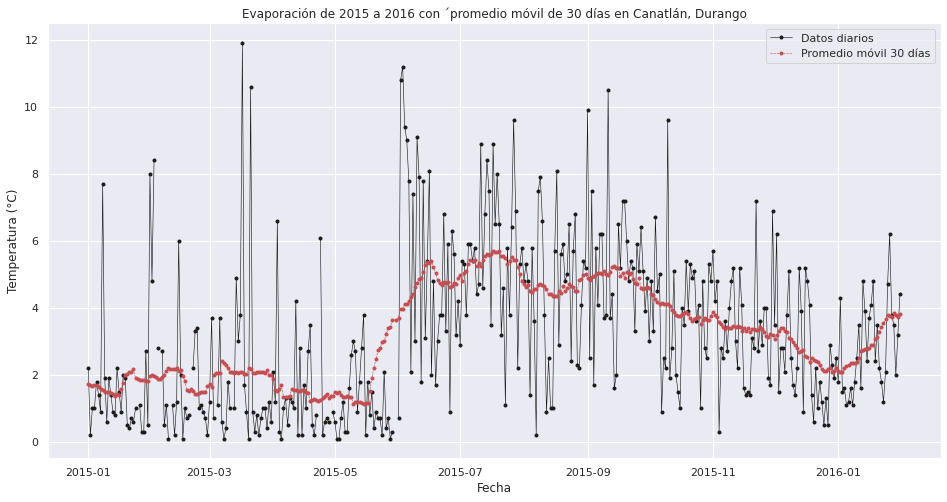

In [111]:
#Para un año de datos, contrastando los datos diarios con el promedio móvil de 30 días

start, end = '2015-01', '2016-01'

sns.set(rc={'figure.figsize':(16, 8)})


#Para temperatura máxima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'], marker='.', linestyle = '-', color = 'r', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_30.loc[start:end, 'Tmax'], marker='.', linestyle = '--', color = 'b', linewidth = 0.6, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas de 2015 a 2016 con ´promedio móvil de 30 días en Canatlán, Durango')
ax.legend();


#Para temperatura mínima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'], marker='.', linestyle = '-', color = 'm', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_30.loc[start:end, 'Tmin'], marker='.', linestyle = '--', color = 'c', linewidth = 0.6, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas de 2015 a 2016 con ´promedio móvil de 30 días en Canatlán, Durango')
ax.legend();


#Para Evaporación

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'], marker='.', linestyle = '-', color = 'k', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_30.loc[start:end, 'Evap'], marker='.', linestyle = '--', color = 'r', linewidth = 0.6, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Evaporación de 2015 a 2016 con ´promedio móvil de 30 días en Canatlán, Durango')
ax.legend();


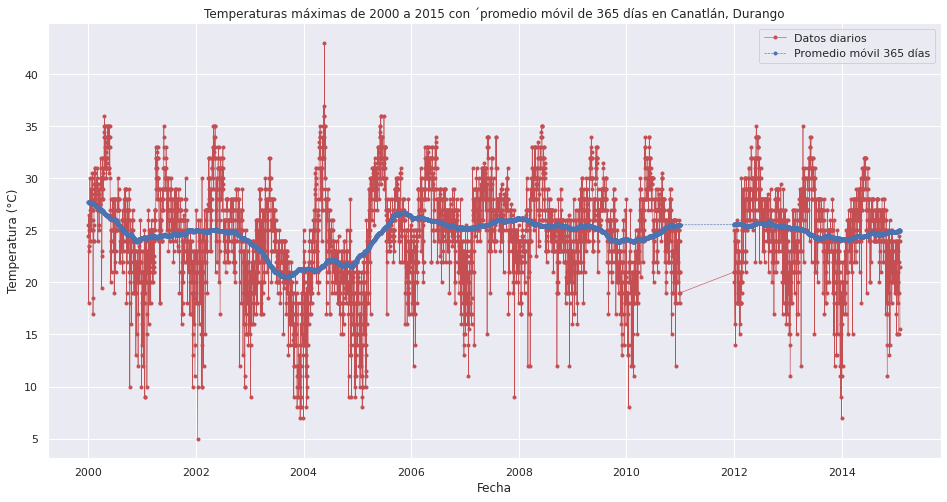

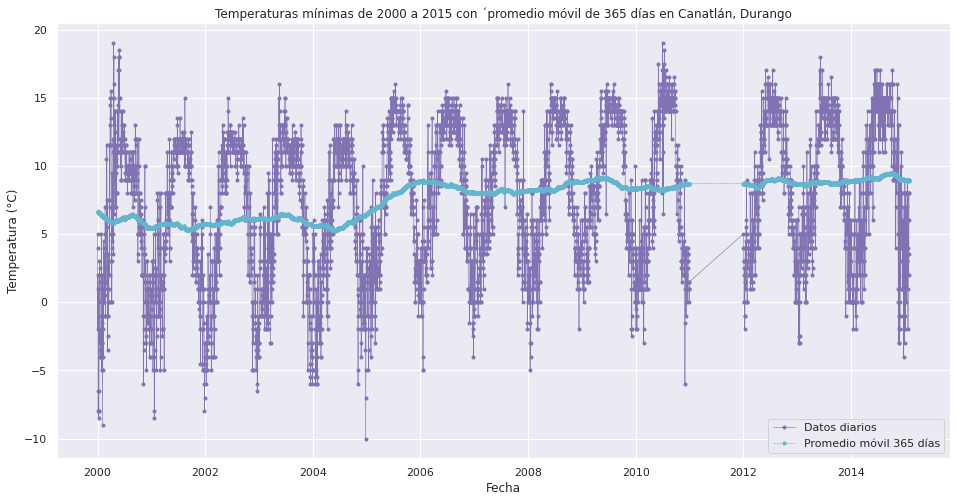

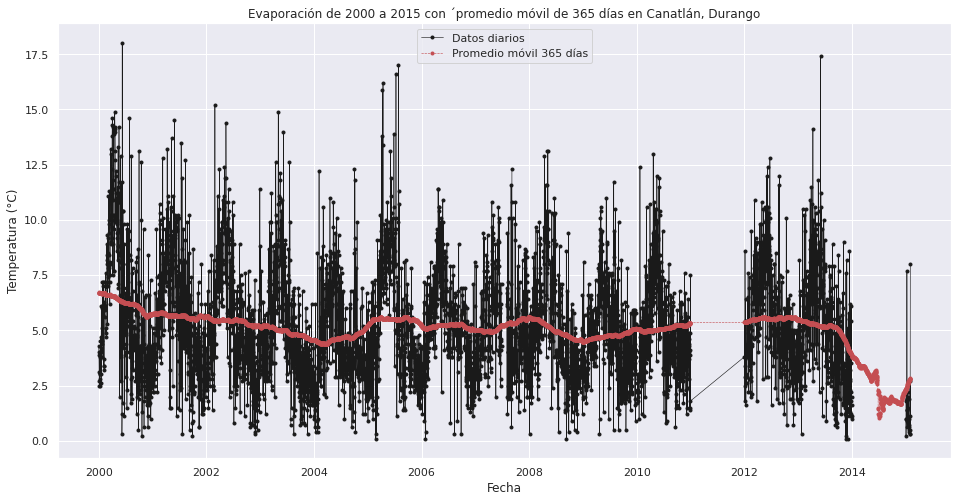

In [112]:
#Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días

start, end = '2000-01', '2015-01'

sns.set(rc={'figure.figsize':(16, 8)})


#Para temperatura máxima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'], marker='.', linestyle = '-', color = 'r', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_365.loc[start:end, 'Tmax'], marker='.', linestyle = '--', color = 'b', linewidth = 0.6, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas de 2000 a 2015 con ´promedio móvil de 365 días en Canatlán, Durango')
ax.legend();


#Para temperatura mínima

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'], marker='.', linestyle = '-', color = 'm', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_365.loc[start:end, 'Tmin'], marker='.', linestyle = '--', color = 'c', linewidth = 0.6, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas de 2000 a 2015 con ´promedio móvil de 365 días en Canatlán, Durango')
ax.legend();


#Para Evaporación

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'], marker='.', linestyle = '-', color = 'k', linewidth = 0.6, label='Datos diarios')
ax.plot(df_90_365.loc[start:end, 'Evap'], marker='.', linestyle = '--', color = 'r', linewidth = 0.6, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Evaporación de 2000 a 2015 con ´promedio móvil de 365 días en Canatlán, Durango')
ax.legend();


# ***Actividad 5***

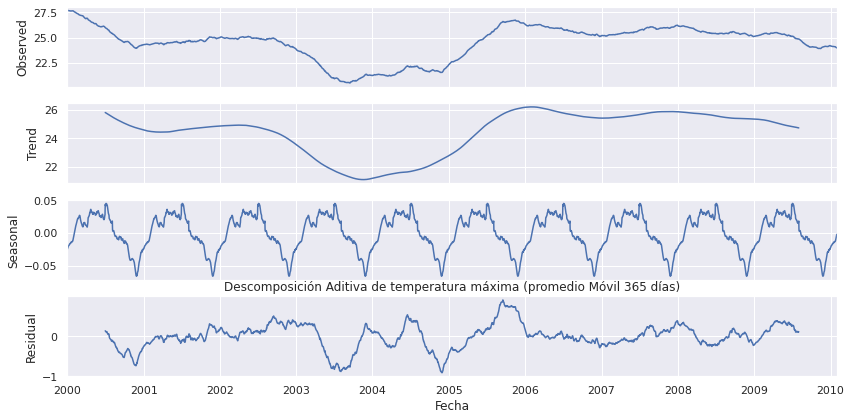

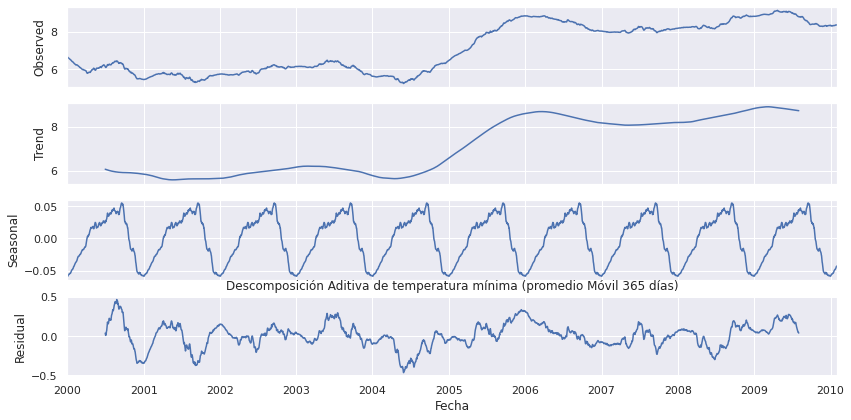

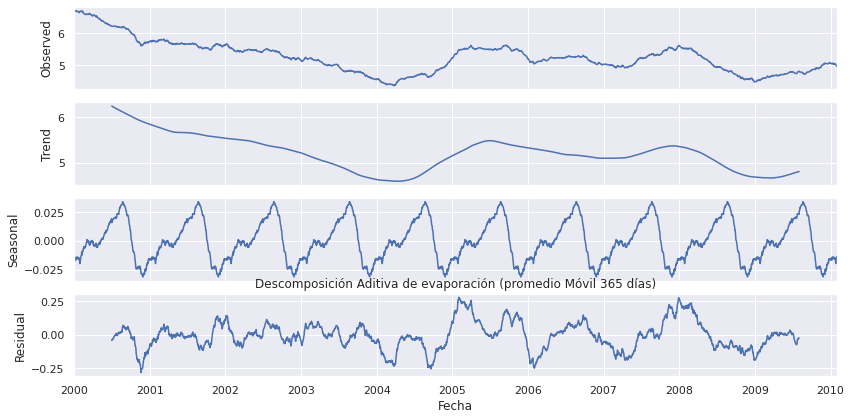

In [113]:
#Actividad 5. Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una 
#serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.
#Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación,
# selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

###Para temperatura máxima
#Tamaño

sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completo 
start, end = '2000-01', '2010-01'

#Ciclo anual
decompfreq = 365

resTmax = sm.tsa.seasonal_decompose(df_90_365.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de temperatura máxima (promedio Móvil 365 días)');


###Para temperatura mínima
#Tamaño

sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completo 
start, end = '2000-01', '2010-01'

#Ciclo anual
decompfreq = 365

resTmax = sm.tsa.seasonal_decompose(df_90_365.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de temperatura mínima (promedio Móvil 365 días)');


###Para evaporación
#Tamaño

sns.set(rc={'figure.figsize':(12, 6)})

#Periodo de datos completo 
start, end = '2000-01', '2010-01'

#Ciclo anual
decompfreq = 365

resTmax = sm.tsa.seasonal_decompose(df_90_365.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de evaporación (promedio Móvil 365 días)');



# ***Actividad 6***

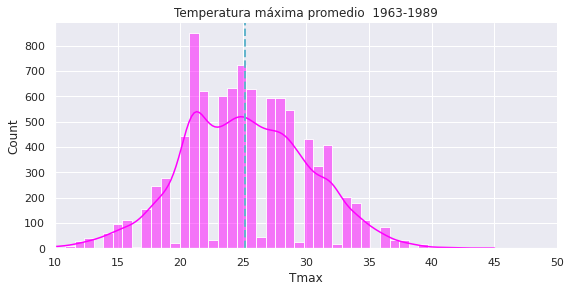

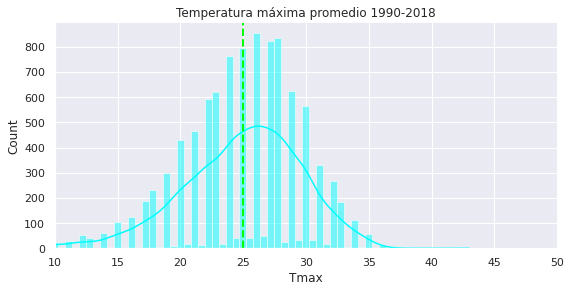

Temperatura máxima promedio df_63 =  25.153224762726488 °C
Temperatura máxima promedio df_90 =  24.95965678310317 °C


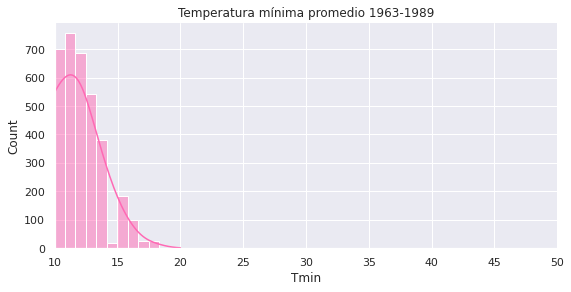

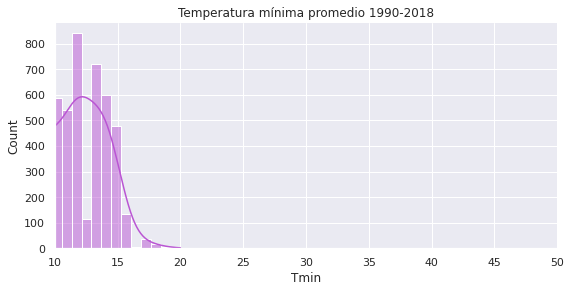

Temperatura mínima promedio df_63 =  6.2794952000862905 °C
Temperatura mínima promedio df_90 =  7.535255304030047 °C


In [117]:
#Explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), 
#sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. 
#Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

#df_63 = df_dm_ts[(df_dm_ts['Año'] >= 1963) & (df_dm_ts['Año'] < 1990)]
#df_90 = df_dm_ts[(df_dm_ts['Año'] >= 1990) & (df_dm_ts['Año'] < 2018)]

graf1 = sns.displot(df_63["Tmax"],kde = True, color = 'fuchsia', height = 4, aspect = 2);
plt.axvline(df_63.Tmax.mean(), linestyle = '--', linewidth = 2, color = 'c');

graf2 = sns.displot(df_90["Tmax"],kde = True, color = 'aqua', height = 4, aspect = 2);
plt.axvline(df_90.Tmax.mean(), linestyle = '--', linewidth = 2, color = 'lime');


graf1.set(title='Temperatura máxima promedio  1963-1989');
graf2.set(title='Temperatura máxima promedio 1990-2018');

graf1.set(xlim=(10,50))
graf2.set(xlim=(10,50))

plt.show();

print('Temperatura máxima promedio df_63 = ', df_63.Tmax.mean(), '°C' )
print('Temperatura máxima promedio df_90 = ', df_90.Tmax.mean(), '°C' )

#Temperatura mínima 

graf1 = sns.displot(df_63["Tmin"],kde = True, color = 'hotpink', height = 4, aspect = 2);
plt.axvline(df_63.Tmin.mean(), linestyle = '--', linewidth = 2, color = 'c');

graf2 = sns.displot(df_90["Tmin"],kde = True, color = 'mediumorchid', height = 4, aspect = 2);
plt.axvline(df_90.Tmin.mean(), linestyle = '--', linewidth = 2, color = 'red');

graf1.set(title='Temperatura mínima promedio 1963-1989');
graf2.set(title='Temperatura mínima promedio 1990-2018');

graf1.set(xlim=(10,50))
graf2.set(xlim=(10,50))

plt.show();

print('Temperatura mínima promedio df_63 = ', df_63.Tmin.mean(), '°C' )
print('Temperatura mínima promedio df_90 = ', df_90.Tmin.mean(), '°C' )
